In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

#### example 1

In [233]:
x0 = torch.tensor(1, dtype=torch.float32, requires_grad = True)
x0

tensor(1., requires_grad=True)

In [234]:
y0 = x0**2
y0

tensor(1., grad_fn=<PowBackward0>)

In [235]:
y0.backward()

In [236]:
y0.grad_fn

In [237]:
y0.grad

In [238]:
x0.grad

tensor(2.)

we can see above that the derivative of x\*\*2, which is 2x, gives a gradient of 2 when x = 1, as expected

#### example 2

In [202]:
x1 = torch.ones(4, requires_grad = True)
x1

tensor([1., 1., 1., 1.], requires_grad=True)

In [203]:
y1 = x1**2
y1

tensor([1., 1., 1., 1.], grad_fn=<PowBackward0>)

In [204]:
y1.grad_fn

In [205]:
z1 = y1.mean()
z1

tensor(1., grad_fn=<MeanBackward0>)

In [206]:
z1.backward()

In [207]:
z1

tensor(1., grad_fn=<MeanBackward0>)

In [209]:
y1

tensor([1., 1., 1., 1.], grad_fn=<PowBackward0>)

In [210]:
print(y1.grad)

None


In [211]:
x1

tensor([1., 1., 1., 1.], requires_grad=True)

In [212]:
x1.grad

tensor([0.5000, 0.5000, 0.5000, 0.5000])

we can see above that the gradient of 2 (which is d/dx(x\*\*2) = 2x, x = 1) <br>
the final gradient vector  <br>
= 1/n \* gradient * ([1., 1., 1., 1.]) <br>
= 1/n \* 2 * ([1., 1., 1., 1.]) <br>
= [0.5, 0.5, 0.5, 0.5]

#### example 3

In [213]:
x2 = torch.from_numpy(np.array([1.,2.,1.,1.]))
x2.requires_grad_(True)
x2

tensor([1., 2., 1., 1.], dtype=torch.float64, requires_grad=True)

In [214]:
y2 = x2**2
y2

tensor([1., 4., 1., 1.], dtype=torch.float64, grad_fn=<PowBackward0>)

In [215]:
z2 = y2.mean()
z2

tensor(1.7500, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [216]:
z2.backward()

In [217]:
z2

tensor(1.7500, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [218]:
y2

tensor([1., 4., 1., 1.], dtype=torch.float64, grad_fn=<PowBackward0>)

In [219]:
x2

tensor([1., 2., 1., 1.], dtype=torch.float64, requires_grad=True)

In [220]:
x2.grad

tensor([0.5000, 1.0000, 0.5000, 0.5000], dtype=torch.float64)

we can see above that the gradient of 2 (which is d/dx(x\*\*2) = 2x) <br>
the final gradient vector  <br>
= 1/n \* gradient * ([1., 2., 1., 1.]) <br>
= 1/n \* 2 * ([1., 2., 1., 1.]) <br>
= [0.5, 1.0, 0.5, 0.5]

#### example 4

In [298]:
x3 = torch.tensor(1, dtype=torch.float32, requires_grad=True)
x3

tensor(1., requires_grad=True)

In [299]:
y3 = torch.sin(x3)
y3

tensor(0.8415, grad_fn=<SinBackward0>)

In [300]:
y3.grad_fn

In [301]:
y3.backward()

In [302]:
x3.grad

tensor(0.5403)

cos(1 radian) = 0.5303

In [303]:
np.cos(1)

0.5403023058681398

In [370]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

now let's test with a range of values to see that the gradient is indeed the derivative. note that the derivative is calculated for each value of x separately. so we get a tensor x with one value, backward pass on that x to get the gradient, get the next x and backward pass to get the gradient of that x, and so on

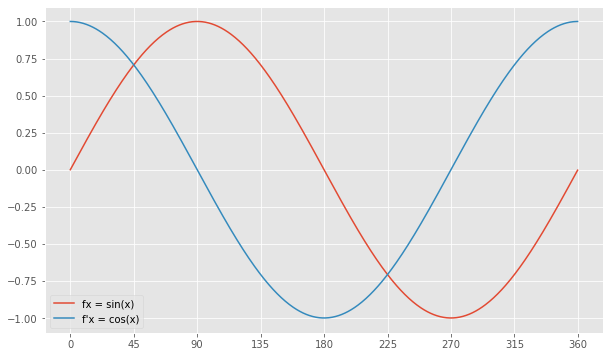

In [391]:
plt.figure(figsize=(10,6))

xarr = np.arange(0,2*np.pi,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = torch.sin(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr * (180/np.pi),funcx, label= 'fx = sin(x)')
plt.plot(xarr * (180/np.pi),funcdashx, label= 'f\'x = cos(x)')
plt.xticks(np.arange(0,361,45))
plt.legend()
plt.show()

remember that the x axis in the digram above is in radians

#### test more funcions

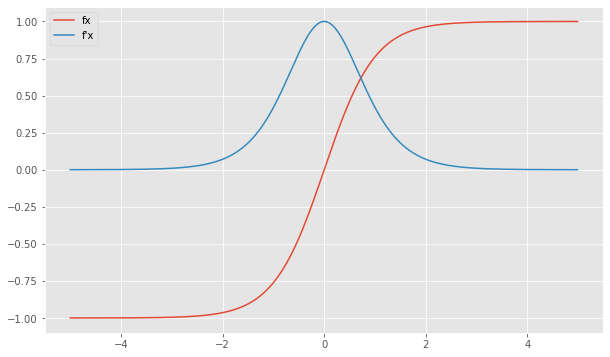

In [411]:
plt.figure(figsize=(10,6))

xarr = np.arange(-5,5,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = torch.tanh(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, label= 'fx')
plt.plot(xarr,funcdashx, label= 'f\'x')
plt.legend()
plt.show()

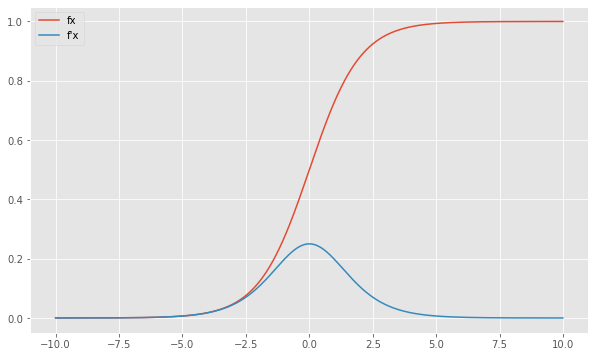

In [430]:
plt.figure(figsize=(10,6))

xarr = np.arange(-10,10,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

def func(x):
    return 1 / (1 + torch.exp(-x))

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = func(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, label= 'fx')
plt.plot(xarr,funcdashx, label= 'f\'x')
plt.legend()
plt.show()

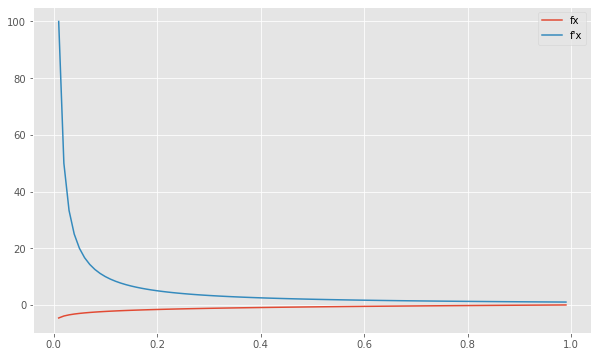

In [423]:
plt.figure(figsize=(10,6))

xarr = np.arange(0,1,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = torch.log(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, label= 'fx')
plt.plot(xarr,funcdashx, label= 'f\'x')
plt.legend()
plt.show()

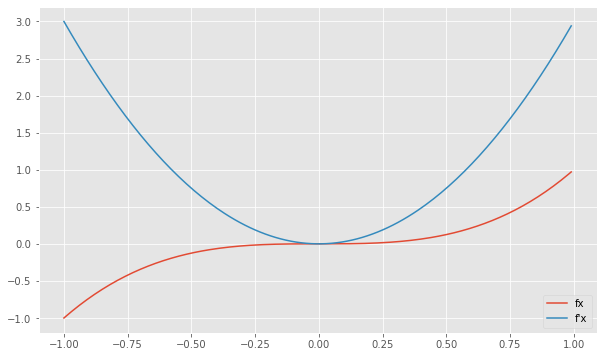

In [392]:
plt.figure(figsize=(10,6))

xarr = np.arange(-1,1,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

def func(x):
    return x**3

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = func(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, label= 'fx')
plt.plot(xarr,funcdashx, label= 'f\'x')
plt.legend()
plt.show()

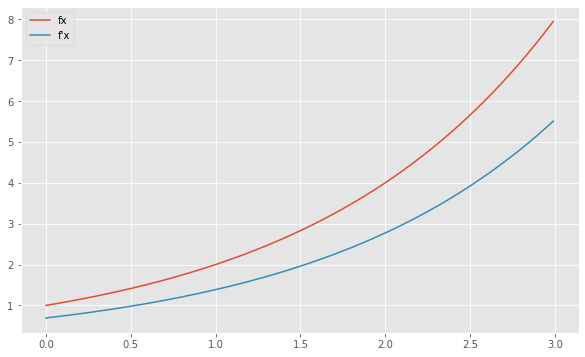

In [398]:
plt.figure(figsize=(10,6))

xarr = np.arange(0,3,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

def func(x):
    return 2**x

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = func(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, label= 'fx')
plt.plot(xarr,funcdashx, label= 'f\'x')
plt.legend()
plt.show()

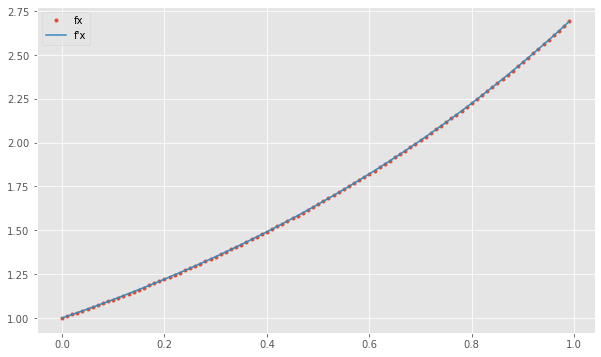

In [394]:
plt.figure(figsize=(10,6))

xarr = np.arange(0,1,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

def func(x):
    return np.e**x

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = func(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, '.', label= 'fx')
plt.plot(xarr,funcdashx, '-', label= 'f\'x')
plt.legend()
plt.show()

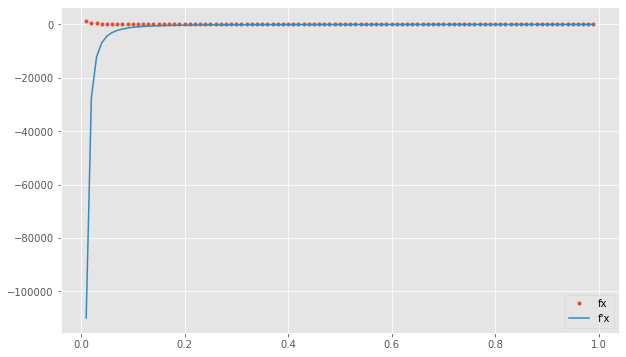

In [431]:
plt.figure(figsize=(10,6))

xarr = np.arange(0,1,0.01)
funcx = np.zeros(xarr.shape)
funcdashx = np.zeros(xarr.shape)

def func(x):
    return x**4 + (2*x**3) + (11*x**-1)

for i,r in enumerate(xarr):
    x = torch.tensor(r, dtype=torch.float32, requires_grad = True)
    fx = func(x)
    fx.backward()
    xarr[i] = x.item()
    funcx[i] = fx.item()
    funcdashx[i] = x.grad.item() # x.grad has the gradient of fx with respect to x
plt.plot(xarr,funcx, '.', label= 'fx')
plt.plot(xarr,funcdashx, '-', label= 'f\'x')
plt.legend()
plt.show()